### IMPORT LIBRARIES


In [2]:
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
import pandas as pd
import os




### Load the Trained Model & Test Data



In [3]:

model = joblib.load ('../models/best_model.pkl')
X_train = joblib.load('../data/transformed/X_train.pkl')
X_test = joblib.load('../data/transformed/X_test.pkl')
y_train = joblib.load('../data/transformed/y_train.pkl')
y_test = joblib.load('../data/transformed/y_test.pkl')

c:\Users\User\anaconda3\envs\diabetes-predictor\lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\User\anaconda3\envs\diabetes-predictor\lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Generate Predictions


In [4]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

pred_actual= pd.DataFrame({'actual': y_test, 'predicted': y_pred, 'proba': y_proba})
pred_actual.to_csv('../reports/predicted_vs_actual.csv', index=False)

### Calculate Metrics : Accuracy, Precision, Recall, F1 score


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1_score': f1_score(y_test, y_pred),
}
import json
os.makedirs('../reports/metrics', exist_ok=True)
with open('../reports/metrics/metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")



Accuracy: 0.7272727272727273
Precision: 0.6304347826086957
Recall: 0.5370370370370371
F1 Score: 0.58
accuracy: 0.7273
precision: 0.6304
recall: 0.5370
f1_score: 0.5800


### Confusion Matrix

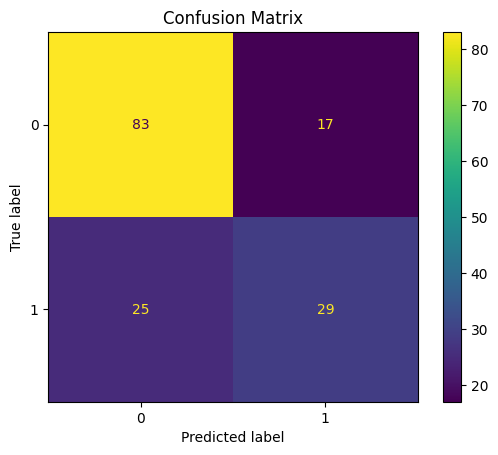

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
os.makedirs('../reports/figures', exist_ok=True)
plt.savefig('../reports/figures/confusion_matrix.png')
plt.show()

###  ROC-AUC Curve


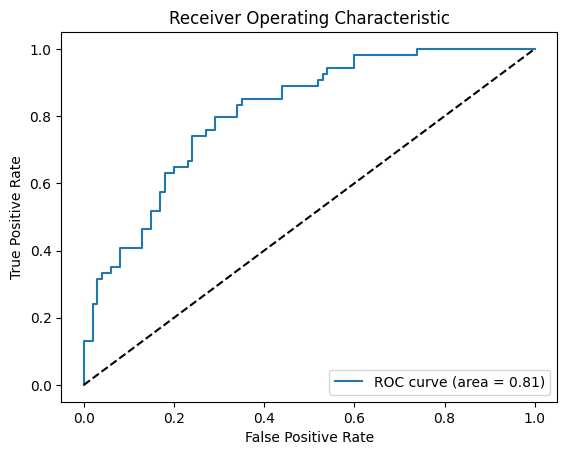

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
os.makedirs('../reports/figures', exist_ok=True)
plt.savefig('../reports/figures/roc_curve.png')
plt.show()


## Classification Report

In [8]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154

